# Input-output properties cells

In [1]:
import h5py
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

rootFolder = '/home/fernando/S1_mouse'
#------------------------------------------------------------------------------  

In [2]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
# Load 55 Morphological Names-> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names-> L1:14 L23:43 L4:46 L5:52 L6:52

with open(rootFolder + '/info/anatomy/S1-cells-distributions-Rat.txt') as metype_file:
    metype_content = metype_file.read()       

MtypeNumber = {}
MEtypeNumber = {}
MtypePop = []
MEtypePop = []
popLabel = {}
N = 0
for line in metype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    MEtypeNumber[metype] = int(n)
    popLabel[metype] = mtype
    MtypeNumber[mtype] = int(m)

    if mtype not in MtypePop:
        MtypePop.append(mtype)
    MEtypePop.append(metype)
    
    N = N + int(n)
    
print ('Number of cells = %d' % N)

Number of cells = 31346


In [3]:
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in MtypePop:
    if popName not in Epops:
        Ipops.append(popName)

In [4]:
def volume(sizey, radius):    
    sizey = 0.001 * sizey # from um to mm
    radius = 0.001 * radius # from um to mm    
    vol = np.pi * radius**2 * sizey
    return vol

def cellNumber(sizey, radius, density):
    number = volume(sizey, radius) * density
    return number

In [5]:
# RAT Cell 2015 
Layerthicknesses = {}  
Layerthicknesses['L1'] = 165
Layerthicknesses['L2'] = 149
Layerthicknesses['L3'] = 353
Layerthicknesses['L4'] = 190
Layerthicknesses['L5'] = 525
Layerthicknesses['L6'] = 700
Neurondensities = {}
Neurondensities['L1'] = 14200
Neurondensities['L2'] = 164600
Neurondensities['L3'] = 83800
Neurondensities['L4'] = 177300
Neurondensities['L5'] = 83900
Neurondensities['L6'] = 131500
neuronsperlayer = {}
neuronsperlayer['L1'] = 338
neuronsperlayer['L23'] = 7524
neuronsperlayer['L4'] = 4656
neuronsperlayer['L5'] = 6114
neuronsperlayer['L6'] = 12651

radius = 210
for layer in ['L1','L4','L5','L6']:
    print ('cell Number in Layer %s =  %.0f' % (layer,cellNumber(Layerthicknesses[layer], radius, Neurondensities[layer])))    
    print ('comparation BBPwebsite %.3f' % (cellNumber(Layerthicknesses[layer], radius, Neurondensities[layer])/neuronsperlayer[layer]))

print ('cell Number in Layer L23 =  %.0f' % (cellNumber(Layerthicknesses['L2'], radius, Neurondensities['L2']) + cellNumber(Layerthicknesses['L3'], 210, Neurondensities['L3'])))      
print ('comparation BBPwebsite %.3f' % ((cellNumber(Layerthicknesses['L2'], radius, Neurondensities['L2']) + cellNumber(Layerthicknesses['L3'], 210, Neurondensities['L3']))/neuronsperlayer['L23']))

synapticdensities = {}
synapticdensities['L1'] = 61728000.0
synapticdensities['L2'] = 101313777.77778
synapticdensities['L3'] = 101313777.77778
synapticdensities['L4'] = 351032889.0
synapticdensities['L5'] = 350586074.0
synapticdensities['L6'] = 105211259.0
synapticNumberMouse = 0
synapticNumberperLayerMouse = {}
for layer in ['L1','L2','L3','L4','L5','L6']:
    print ('synaptic Number in Layer %s =  %.0f' % (layer,cellNumber(Layerthicknesses[layer], radius, synapticdensities[layer])))       
    synapticNumberperLayerMouse[layer] = cellNumber(Layerthicknesses[layer], radius, synapticdensities[layer])
    synapticNumberMouse = synapticNumberMouse + synapticNumberperLayerMouse[layer]
    
print ('synaptic Number in a cilinder (d = %d um) =  %.0f' % (2*radius,synapticNumberMouse))   


cell Number in Layer L1 =  325
comparation BBPwebsite 0.960
cell Number in Layer L4 =  4667
comparation BBPwebsite 1.002
cell Number in Layer L5 =  6103
comparation BBPwebsite 0.998
cell Number in Layer L6 =  12753
comparation BBPwebsite 1.008
cell Number in Layer L23 =  7496
comparation BBPwebsite 0.996
synaptic Number in Layer L1 =  1411090
synaptic Number in Layer L2 =  2091430
synaptic Number in Layer L3 =  4954863
synaptic Number in Layer L4 =  9240381
synaptic Number in Layer L5 =  25500132
synaptic Number in Layer L6 =  10203489
synaptic Number in a cilinder (d = 420 um) =  53401385


In [6]:
y = 0
cellNumberperLayerMouse = {}
for layer in ['L1','L2','L3','L4','L5','L6']:    
    y = y + Layerthicknesses[layer]     
volume(y,radius)

0.28844909940053115

In [7]:
# Load 55 Morphological Names and Cell pop numbers -> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names used to import the cells from 'cell_data/' -> L1:14 L23:43 L4:46 L5:52 L6:52
RatL1Number = 0
for popName in MtypePop[0:6]:
    RatL1Number = RatL1Number + MtypeNumber[popName]
RatL23Number = 0
for popName in MtypePop[6:16]:
    RatL23Number = RatL23Number + MtypeNumber[popName]
RatL4Number = 0
for popName in MtypePop[16:28]:
    RatL4Number = RatL4Number + MtypeNumber[popName]
RatL5Number = 0
for popName in MtypePop[28:41]:
    RatL5Number = RatL5Number + MtypeNumber[popName]    
RatL6Number = 0
for popName in MtypePop[41:55]:
    RatL6Number = RatL6Number + MtypeNumber[popName]  
    
cellNumberperLayerRat = {}
cellNumberperLayerRat['L1'] = RatL1Number
cellNumberperLayerRat['L23'] = RatL23Number
cellNumberperLayerRat['L4'] = RatL4Number
cellNumberperLayerRat['L5'] = RatL5Number
cellNumberperLayerRat['L6'] = RatL6Number
    
RatL1Number + RatL23Number + RatL4Number + RatL5Number + RatL6Number

31346

#### Thalamic connections - Meyer el al. (Cerebral Cortex 2010)
doi:10.1093/cercor/bhq069

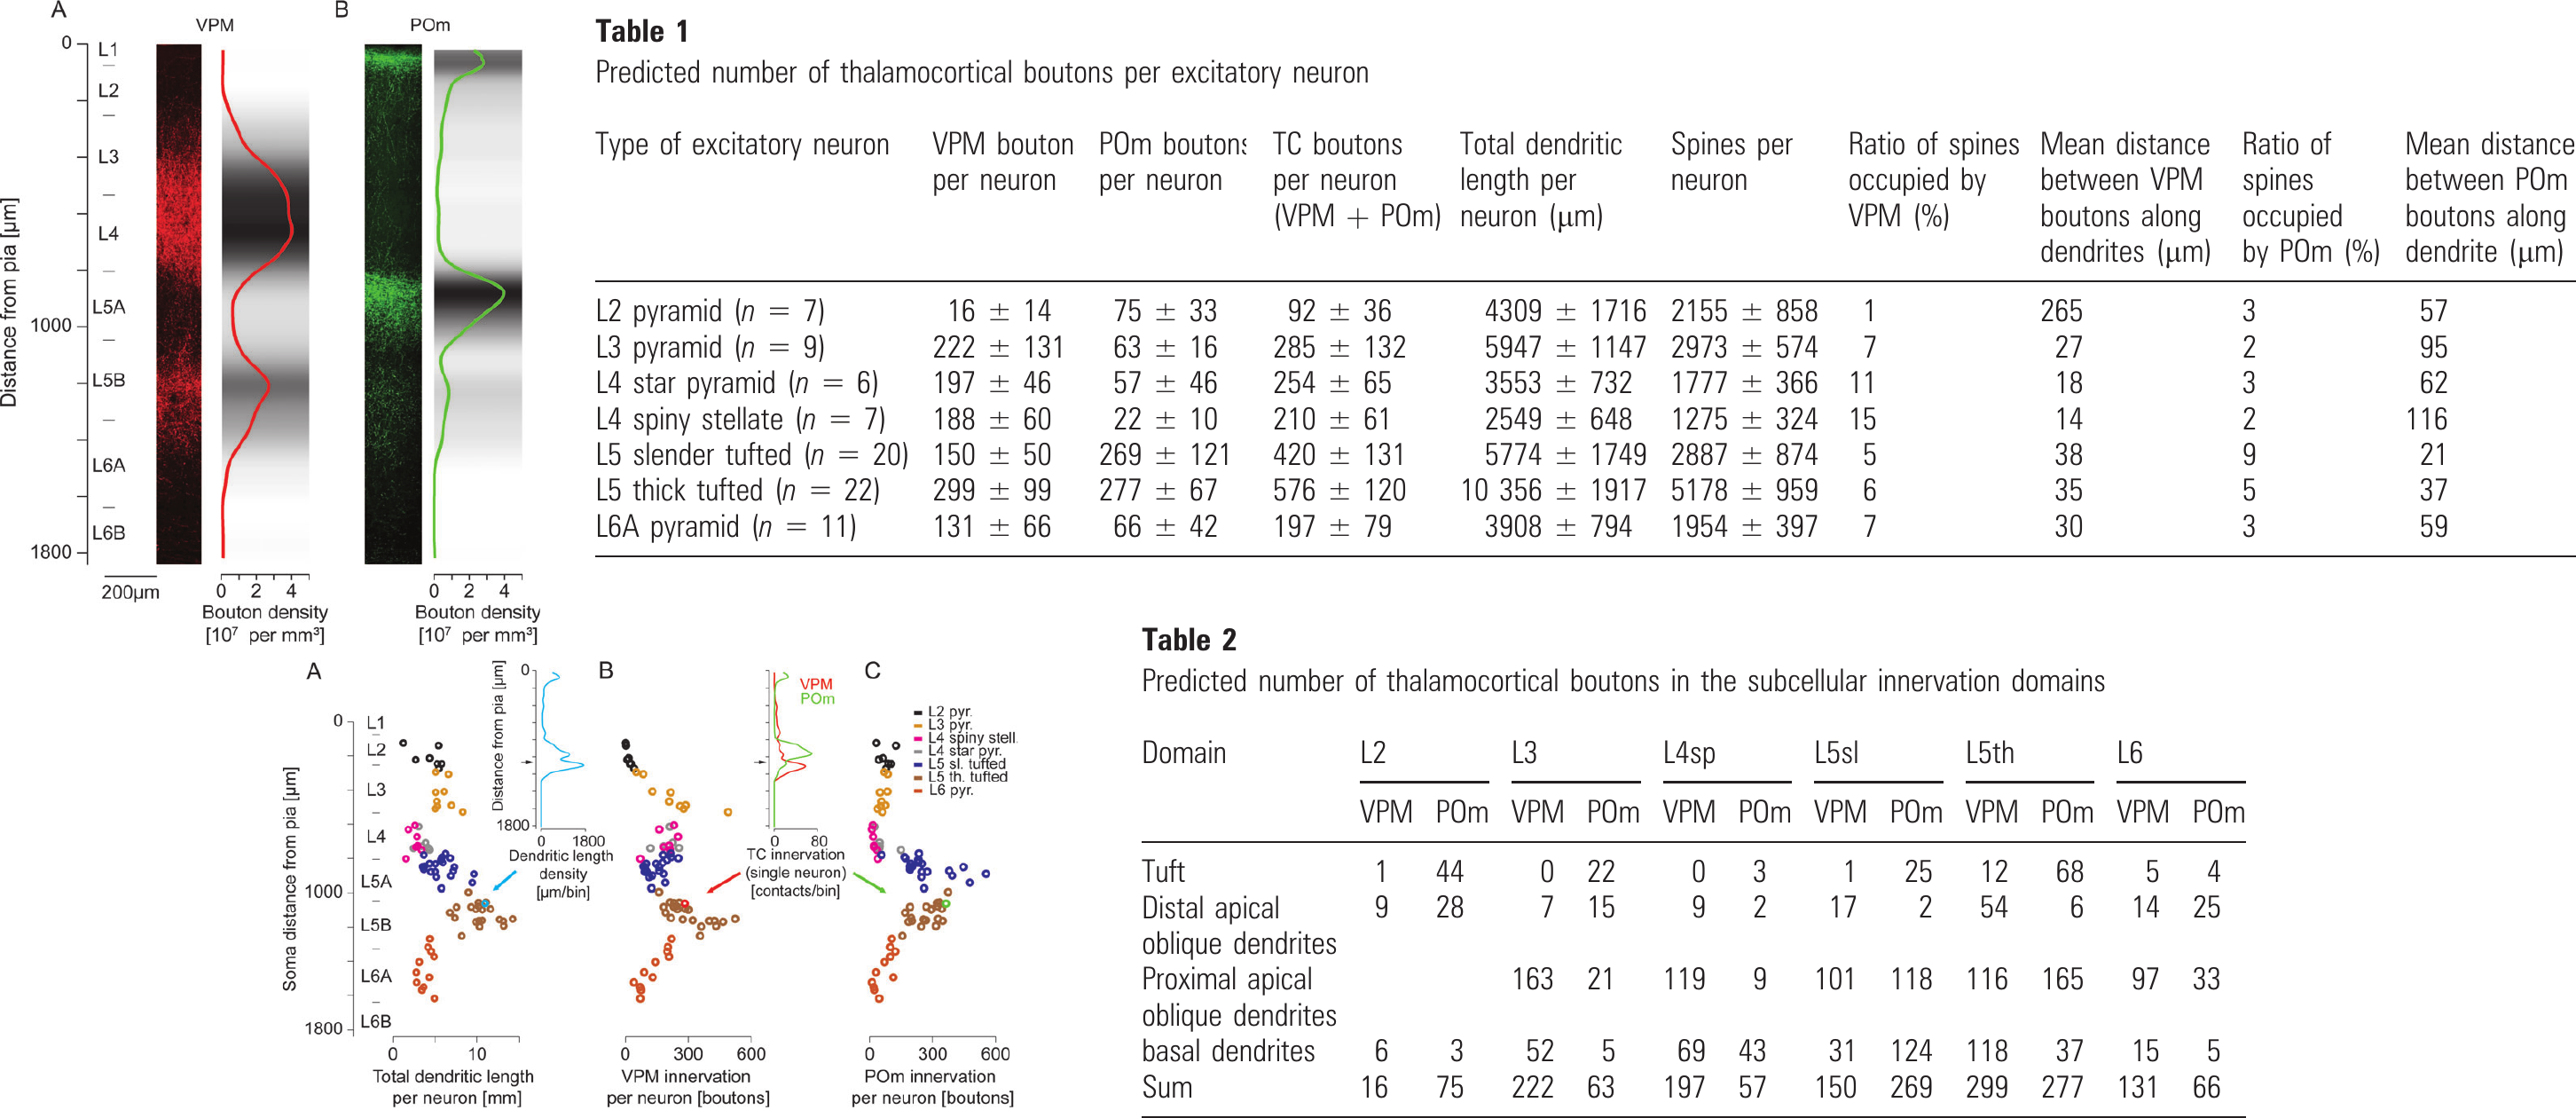

In [8]:
for layer in ['L1','L2','L3','L4','L5','L6']:
    print ('cell Number in Layer %s =  %.0f' % (layer,cellNumber(Layerthicknesses[layer], radius, Neurondensities[layer])))    
  
print ('cell Number in Layer L23 =  %.0f' % (cellNumber(Layerthicknesses['L2'], radius, Neurondensities['L2']) + cellNumber(Layerthicknesses['L3'], 210, Neurondensities['L3'])))      


cell Number in Layer L1 =  325
cell Number in Layer L2 =  3398
cell Number in Layer L3 =  4098
cell Number in Layer L4 =  4667
cell Number in Layer L5 =  6103
cell Number in Layer L6 =  12753
cell Number in Layer L23 =  7496


In [9]:
# Table 1
L2_PY = [16, 14, 75, 33, 92, 36, 4309, 1716, 2155, 858, 1, 265, 3, 57]
L3_PY = [222, 131, 63, 16, 285, 132, 5947, 1147, 2973, 574, 7, 27, 2, 95]
L4_nSS = [197, 46, 57, 46, 254, 65, 3553, 732, 1777, 366, 11, 18, 3, 62]
L4_SS = [188, 60, 22, 10, 210, 61, 2549, 648, 1275, 324, 15, 14, 2, 116]
L5_nTT = [150, 50, 269, 121, 420, 131, 5774, 1749, 2887, 874, 5, 38, 9, 21]
L5_TT = [299, 99, 277, 67, 576, 120, 10356, 1917, 5178, 959, 6, 35, 5, 37]
L6_PY = [131, 66, 66, 42, 197, 79, 3908, 794, 1954, 397, 7, 30, 3, 59]
L23_PY = {}
#weighted average
for values in range(14):
    L23_PY[values] = np.ceil((L2_PY[values]*3398+L3_PY[values]*4098)/7496)
L23_PY

{0: 129.0,
 1: 78.0,
 2: 69.0,
 3: 24.0,
 4: 198.0,
 5: 89.0,
 6: 5205.0,
 7: 1405.0,
 8: 2603.0,
 9: 703.0,
 10: 5.0,
 11: 135.0,
 12: 3.0,
 13: 78.0}

In [10]:
Nexc = 0
for popName in Epops:    
    print(popName, MtypeNumber[popName])
    Nexc = Nexc + MtypeNumber[popName]
Nexc

L23_PC 5877
L4_PC 2674
L4_SS 406
L4_SP 1098
L5_TTPC1 2403
L5_TTPC2 2003
L5_STPC 302
L5_UTPC 342
L6_TPC_L1 1637
L6_TPC_L4 1440
L6_BPC 3174
L6_IPC 3476
L6_UTPC 1735


26567

In [11]:
# TOTAL NUMBER OF THALAMIC SYNAPSES (BOUTON) IN EXC NEURONS
meanVPM = [L23_PY[0], L4_nSS[0], L4_SS[0], L5_nTT[0], L5_TT[0], L6_PY[0]]
meanPOm = [L23_PY[2], L4_nSS[2], L4_SS[2], L5_nTT[2], L5_TT[2], L6_PY[2]]

numberVPM = MtypeNumber['L23_PC']*L23_PY[0]
numberPOm = MtypeNumber['L23_PC']*L23_PY[2]    
print('L23_PY - synVPM = %.0f, synPOm = %.0f' % (numberVPM, numberPOm))

numberVPM = numberVPM + MtypeNumber['L4_SS']*L4_SS[0] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[0]
numberPOm = numberPOm + MtypeNumber['L4_SS']*L4_SS[2] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[2]
print('L4_PY - synVPM = %.0f, synPOm = %.0f' % (MtypeNumber['L4_SS']*L4_SS[0] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[0], MtypeNumber['L4_SS']*L4_SS[2] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[2]))

numberVPM = numberVPM + (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[0] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[0]
numberPOm = numberPOm + (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[2] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[2]
print('L5_PY - synVPM = %.0f, synPOm = %.0f' % ( (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[0] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[0], (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[2] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[2]))

numberVPM = numberVPM + (MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[0]
numberPOm = numberPOm + (MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[2]
print('L6_PY - synVPM = %.0f, synPOm = %.0f' % ( (MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[0], (MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[2]))

print('\n All Exc - synVPM = %.0f, synPOm = %.0f' % (numberVPM, numberPOm))

L23_PY - synVPM = 758133, synPOm = 405513
L4_PY - synVPM = 819412, synPOm = 223936
L5_PY - synVPM = 1413994, synPOm = 1393698
L6_PY - synVPM = 1274237, synPOm = 641982

 All Exc - synVPM = 4265776, synPOm = 2665129


In [12]:
# TOTAL NUMBER SYNAPSES (BOUTON) IN EXC-POST NEURONS
mean = [L23_PY[8], L4_nSS[8], L4_SS[8], L5_nTT[8], L5_TT[8], L6_PY[8]]

number= MtypeNumber['L23_PC']*L23_PY[8] 
print('L23_PY - syn = %.0f' % (numberVPM))

number = number + MtypeNumber['L4_SS']*L4_SS[8] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[8]
print('L4_PY - syn = %.0f' % (MtypeNumber['L4_SS']*L4_SS[8] + (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*L4_nSS[8]))

number = number + (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[8] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[8]
print('L5_PY - syn = %.0f' % ((MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*L5_TT[8] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*L5_nTT[8]))

number = number + (MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[8]
print('L6_PY - syn = %.0f' % ((MtypeNumber['L6_TPC_L1']+MtypeNumber['L6_TPC_L4']+MtypeNumber['L6_BPC']+MtypeNumber['L6_IPC'])*L6_PY[8]))

print('\n All syn = %.0f' % (number))

L23_PY - syn = 4265776
L4_PY - syn = 7220494
L5_PY - syn = 24673496
L6_PY - syn = 19006558

 All syn = 66198379


In [13]:
100*numberVPM/number

6.443928181383415

In [14]:
# Cell 2015 - each thalamic fiber innervates 903 ± 66 neurons
# (n = 100 fibers; 775 ± 57 excitatory and 83 ± 11 inhibitory neurons)
# Layer-by-layer bouton density profiles (Meyer et al., 2010b)
# 12 synapses/connection on L5 pyramidal neurons
# 8.1 ± 4.2 synapses/connection on  L4PCs
eachthalamicfiberinnervates = 775 #  excitatory neurons
synapsesperconnection = 11
NumberofFibers = (numberVPM/(eachthalamicfiberinnervates*synapsesperconnection))
int(NumberofFibers)

500

# Adaptation to Mouse Model 
https://www.humanbrainproject.eu/en/brain-simulation/mouse-sscx/

In [15]:
int(NumberofFibers*(7859/N))

125

In [16]:
eachthalamicfiberinnervatesE = 775 #  excitatory neurons
eachthalamicfiberinnervatesI = 83 #  excitatory neurons
RATIO_IE = 83/775
RATIO_IE

0.10709677419354839

In [17]:
ratioN_IE = (N-Nexc)/(Nexc)
ratioN_IE

0.17988481951292956

In [18]:
ratiosynTh_IE = RATIO_IE/ratioN_IE
ratiosynTh_IE

0.5953630466624817

In [19]:
# TOTAL NUMBER OF THALAMIC SYNAPSES (BOUTON) IN EXC NEURONS - table 1 
meanVPM = [L23_PY[0], L4_nSS[0], L4_SS[0], L5_nTT[0], L5_TT[0], L6_PY[0]]
meanPOm = [L23_PY[2], L4_nSS[2], L4_SS[2], L5_nTT[2], L5_TT[2], L6_PY[2]]

In [20]:
# convergence (number of presyn cells per postsyn cell)
ratiosynTh_IE = 0.5954
NumberofFibers_Th_S1 = 125

convergence_Th_S1 = {}
convergence_Th_S1['VPM_sTC'] = {}
convergence_Th_S1['POm_sTC_s1'] = {}

popslayer = ['L23_PY', 'L4_nSS', 'L4_SS', 'L5_nTT','L5_TT', 'L6_PY', 'L23_IN', 'L4_IN', 'L5_IN', 'L6_IN']

popnumber = 0
for poply in popslayer[0:6]:
    convergence_Th_S1['VPM_sTC'][poply] = meanVPM[popnumber]
    convergence_Th_S1['POm_sTC_s1'][poply] = meanPOm[popnumber]
    popnumber = popnumber + 1


convergence_Th_S1['VPM_sTC']['L23_IN'] = ratiosynTh_IE*meanVPM[0]
convergence_Th_S1['POm_sTC_s1']['L23_IN'] = ratiosynTh_IE*meanPOm[0]

nsyn = (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*meanVPM[1] + MtypeNumber['L4_SS']*meanVPM[2]
convergence_Th_S1['VPM_sTC']['L4_IN'] = ratiosynTh_IE*(nsyn/(MtypeNumber['L4_SS']+MtypeNumber['L4_PC']+MtypeNumber['L4_SP']))
nsyn = (MtypeNumber['L4_PC']+MtypeNumber['L4_SP'])*meanPOm[1] + MtypeNumber['L4_SS']*meanPOm[2]
convergence_Th_S1['POm_sTC_s1']['L4_IN'] = ratiosynTh_IE*(nsyn/(MtypeNumber['L4_SS']+MtypeNumber['L4_PC']+MtypeNumber['L4_SP']))

nsyn = (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*meanVPM[4] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*meanVPM[3]
convergence_Th_S1['VPM_sTC']['L5_IN'] = ratiosynTh_IE*(nsyn/(MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2']+MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC']))
nsyn = (MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2'])*meanPOm[4] + (MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC'])*meanPOm[3]
convergence_Th_S1['POm_sTC_s1']['L5_IN'] = ratiosynTh_IE*(nsyn/(MtypeNumber['L5_TTPC1']+MtypeNumber['L5_TTPC2']+MtypeNumber['L5_STPC']+MtypeNumber['L5_UTPC']))

convergence_Th_S1['VPM_sTC']['L6_IN'] = ratiosynTh_IE*meanVPM[5]
convergence_Th_S1['POm_sTC_s1']['L6_IN'] = ratiosynTh_IE*meanPOm[5]


In [21]:
convergence_Th_S1

{'VPM_sTC': {'L23_PY': 129.0,
  'L4_nSS': 197,
  'L4_SS': 188,
  'L5_nTT': 150,
  'L5_TT': 299,
  'L6_PY': 131,
  'L23_IN': 76.8066,
  'L4_IN': 116.77307438966012,
  'L5_IN': 166.71129259405944,
  'L6_IN': 77.9974},
 'POm_sTC_s1': {'L23_PY': 69.0,
  'L4_nSS': 57,
  'L4_SS': 22,
  'L5_nTT': 269,
  'L5_TT': 277,
  'L6_PY': 66,
  'L23_IN': 41.0826,
  'L4_IN': 31.912755959789376,
  'L5_IN': 164.31837409900993,
  'L6_IN': 39.296400000000006}}

In [22]:
popslayerMtype = {}
popslayerMtype['L23_PY'] = ['L23_PC']
popslayerMtype['L4_nSS'] = ['L4_PC', 'L4_SP']
popslayerMtype['L4_SS'] = ['L4_SS']
popslayerMtype['L5_nTT'] = ['L5_STPC', 'L5_UTPC']
popslayerMtype['L5_TT'] = ['L5_TTPC1', 'L5_TTPC2']
popslayerMtype['L6_PY'] =  ['L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']

In [26]:
print ('mtype','VPM_sTC','POm_sTC_s1','nameref')

for popsly in popslayerMtype:
    for mtype in Epops:
        if mtype in popslayerMtype[popsly]:            
            print (mtype,int(convergence_Th_S1['VPM_sTC'][popsly]),int(convergence_Th_S1['POm_sTC_s1'][popsly]),popsly)        

for mtype in Ipops:
    if mtype[0:2] == 'L1':            
            print (mtype,0,41,'L23_IN_POm') ## include POm ->L1
  
for popsly in ['L23_IN', 'L4_IN', 'L5_IN', 'L6_IN']:
    for mtype in Ipops:
        if mtype[0:2] in popsly[0:2]:            
            print (mtype,int(convergence_Th_S1['VPM_sTC'][popsly]),int(convergence_Th_S1['POm_sTC_s1'][popsly]),popsly)
  

mtype VPM_sTC POm_sTC_s1 nameref
L23_PC 129 69 L23_PY
L4_PC 197 57 L4_nSS
L4_SP 197 57 L4_nSS
L4_SS 188 22 L4_SS
L5_STPC 150 269 L5_nTT
L5_UTPC 150 269 L5_nTT
L5_TTPC1 299 277 L5_TT
L5_TTPC2 299 277 L5_TT
L6_TPC_L1 131 66 L6_PY
L6_TPC_L4 131 66 L6_PY
L6_BPC 131 66 L6_PY
L6_IPC 131 66 L6_PY
L6_UTPC 131 66 L6_PY
L1_DAC 0 41 L23_IN_POm
L1_DLAC 0 41 L23_IN_POm
L1_HAC 0 41 L23_IN_POm
L1_NGC-DA 0 41 L23_IN_POm
L1_NGC-SA 0 41 L23_IN_POm
L1_SLAC 0 41 L23_IN_POm
L23_BP 76 41 L23_IN
L23_BTC 76 41 L23_IN
L23_ChC 76 41 L23_IN
L23_DBC 76 41 L23_IN
L23_LBC 76 41 L23_IN
L23_MC 76 41 L23_IN
L23_NBC 76 41 L23_IN
L23_NGC 76 41 L23_IN
L23_SBC 76 41 L23_IN
L4_BP 116 31 L4_IN
L4_BTC 116 31 L4_IN
L4_ChC 116 31 L4_IN
L4_DBC 116 31 L4_IN
L4_LBC 116 31 L4_IN
L4_MC 116 31 L4_IN
L4_NBC 116 31 L4_IN
L4_NGC 116 31 L4_IN
L4_SBC 116 31 L4_IN
L5_BP 166 164 L5_IN
L5_BTC 166 164 L5_IN
L5_ChC 166 164 L5_IN
L5_DBC 166 164 L5_IN
L5_LBC 166 164 L5_IN
L5_MC 166 164 L5_IN
L5_NBC 166 164 L5_IN
L5_NGC 166 164 L5_IN
L5_SBC 166 